In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA and Modeling
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import precision_score, recall_score, accuracy_score,\
f1_score, ConfusionMatrixDisplay, classification_report

# This is used to overcome an issue with setting up tensorflow in M1/M1 
# Suspect tensorflow-macos not very fit with GPU, use CPU only with
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

# Data Load
filename = ('Data/flight_df.csv')
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,2,3,3,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,4,4,4,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,3,3,3,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,3,3,3,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,4,1,1,3,3,3,4,0,0,1,1,1,0


# # Exploring

In [160]:
# No duplicates
df.duplicated().sum()

0

In [161]:
# No missing data
df.isna().sum()

Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Loyal Customer                       0
Business Travel                      0
satisfied                            0
dtype: int64

In [162]:
pd.set_option('display.max_columns', None)
df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,3.349100,3.385350,3.350850,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,1.333348,1.278451,1.316602,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


In [163]:
dtypes = df.dtypes
num_cols = dtypes[dtypes=='int64'].index
num_cols

Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Loyal Customer', 'Business Travel', 'satisfied'],
      dtype='object')

In [164]:
# Some kind of categorization for most columns 
for col in num_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Age
39    551
25    504
40    502
42    497
44    478
     ... 
78      6
73      5
79      4
85      3
76      3
Name: Age, Length: 75, dtype: int64



- Column= Class
3    9560
1    9004
2    1436
Name: Class, dtype: int64



- Column= Flight Distance
337     144
404      88
2475     81
862      78
594      78
       ... 
1573      1
875       1
1963      1
3584      1
1515      1
Name: Flight Distance, Length: 3108, dtype: int64



- Column= Inflight wifi service
3    4992
2    4969
4    3778
1    3468
5    2213
0     580
Name: Inflight wifi service, dtype: int64



- Column= Departure/Arrival time convenient
4    4844
5    4348
3    3490
2    3265
1    3006
0    1047
Name: Departure/Arrival time convenient, dtype: int64



- Column= Ease of Online booking
3    4731
2    4637
4    3729
1    3399
5    2648
0     856
Name: Ease of Online booking, dtype: int64



- Column= Gate location
3    5547
4    4619
2    3733
1    3414
5    2686
0       1
Name: Gate location, dtype: in

In [165]:
df['satisfied'].value_counts()

0    11339
1     8661
Name: satisfied, dtype: int64

## Scaling, KMeans and Inertia

In [166]:
# Instantiate Scaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

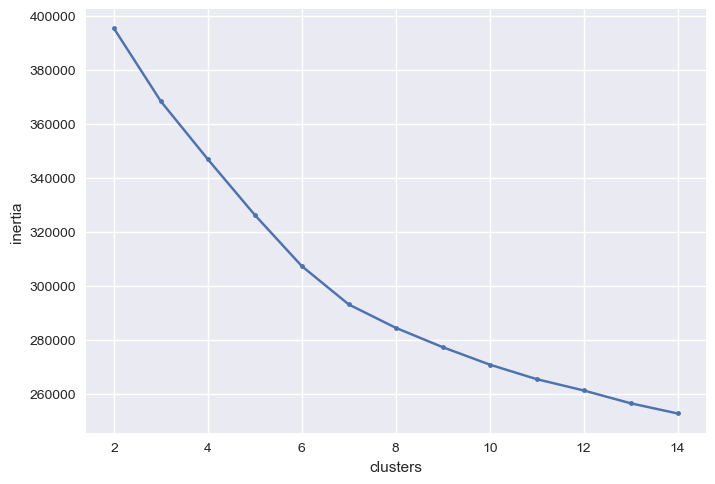

In [167]:
# Create an empty list of inertias

inertias = []

# Loop through K values between  and  and store the inertias in the list

for k in range (2,15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Visualize scores

plt.plot(range(2,15), inertias, marker = '.');
plt.xlabel('clusters');
plt.ylabel('inertia');

* Not a real pronounced elbow, maybe one at 6 or 7

## Silhouette Scores

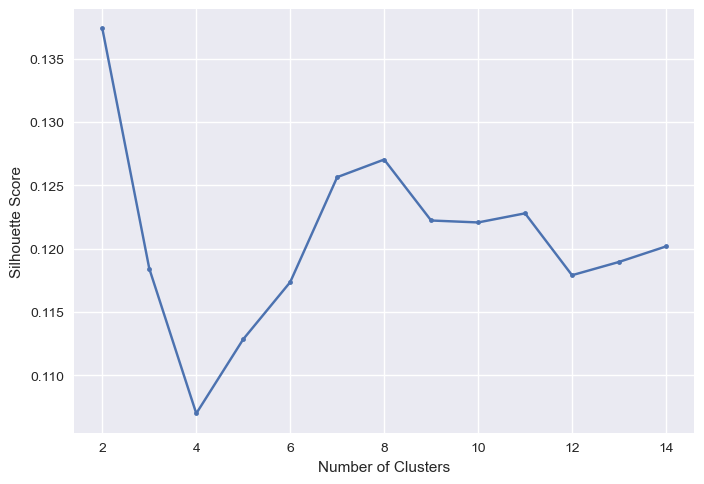

In [168]:
# Empty List  

silhouette_scores = []

# For loop

for i in range(2,15):
    kmeans = KMeans(n_clusters =i, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df,kmeans.labels_))
    
# Visualize scores
plt.plot(range(2,15), silhouette_scores, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Score');

*Highest score is with 2 clusters

In [169]:
# Highest Silhouette score with cluster of 2 
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.13737698631244874

In [170]:
kmeans2 = KMeans(n_clusters = 7, random_state=42)
kmeans2.fit(scaled_df)
silhouette_score(scaled_df, kmeans2.labels_)

0.12564340331659532

In [171]:
kmeans3 = KMeans(n_clusters = 6, random_state=42)
kmeans3.fit(scaled_df)
silhouette_score(scaled_df, kmeans3.labels_)

0.11736163354045011

* Since the elbow isn't really pronounced, moving forward based on the highest silhouette score with 2 clusters. 

In [172]:
# Add clusters as a column in dataframe; using 2 clusters from above
df['cluster'] = kmeans.labels_
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,2,3,3,3,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,4,4,4,4,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,3,3,3,4,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,3,3,3,3,4,3,1,91,80,0,1,1,0,0
4,40,1,775,4,3,3,3,4,4,4,4,1,1,3,3,3,4,0,0,1,1,1,0,0


In [173]:
# Group dataframe by cluster and aggregate by means values
cluster_groups = df.groupby('cluster', as_index=False).agg(pd.Series.mode)
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,25,1,337,2,4,2,3,2,3,3,2,3,2,4,3,4,3,0,0,0,1,1,0
1,1,39,3,337,4,4,4,3,5,4,5,5,4,4,4,4,4,5,0,0,1,1,1,1


## Analysis

In [174]:
cluster_groups.columns[1:]

Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Loyal Customer', 'Business Travel', 'satisfied'],
      dtype='object')

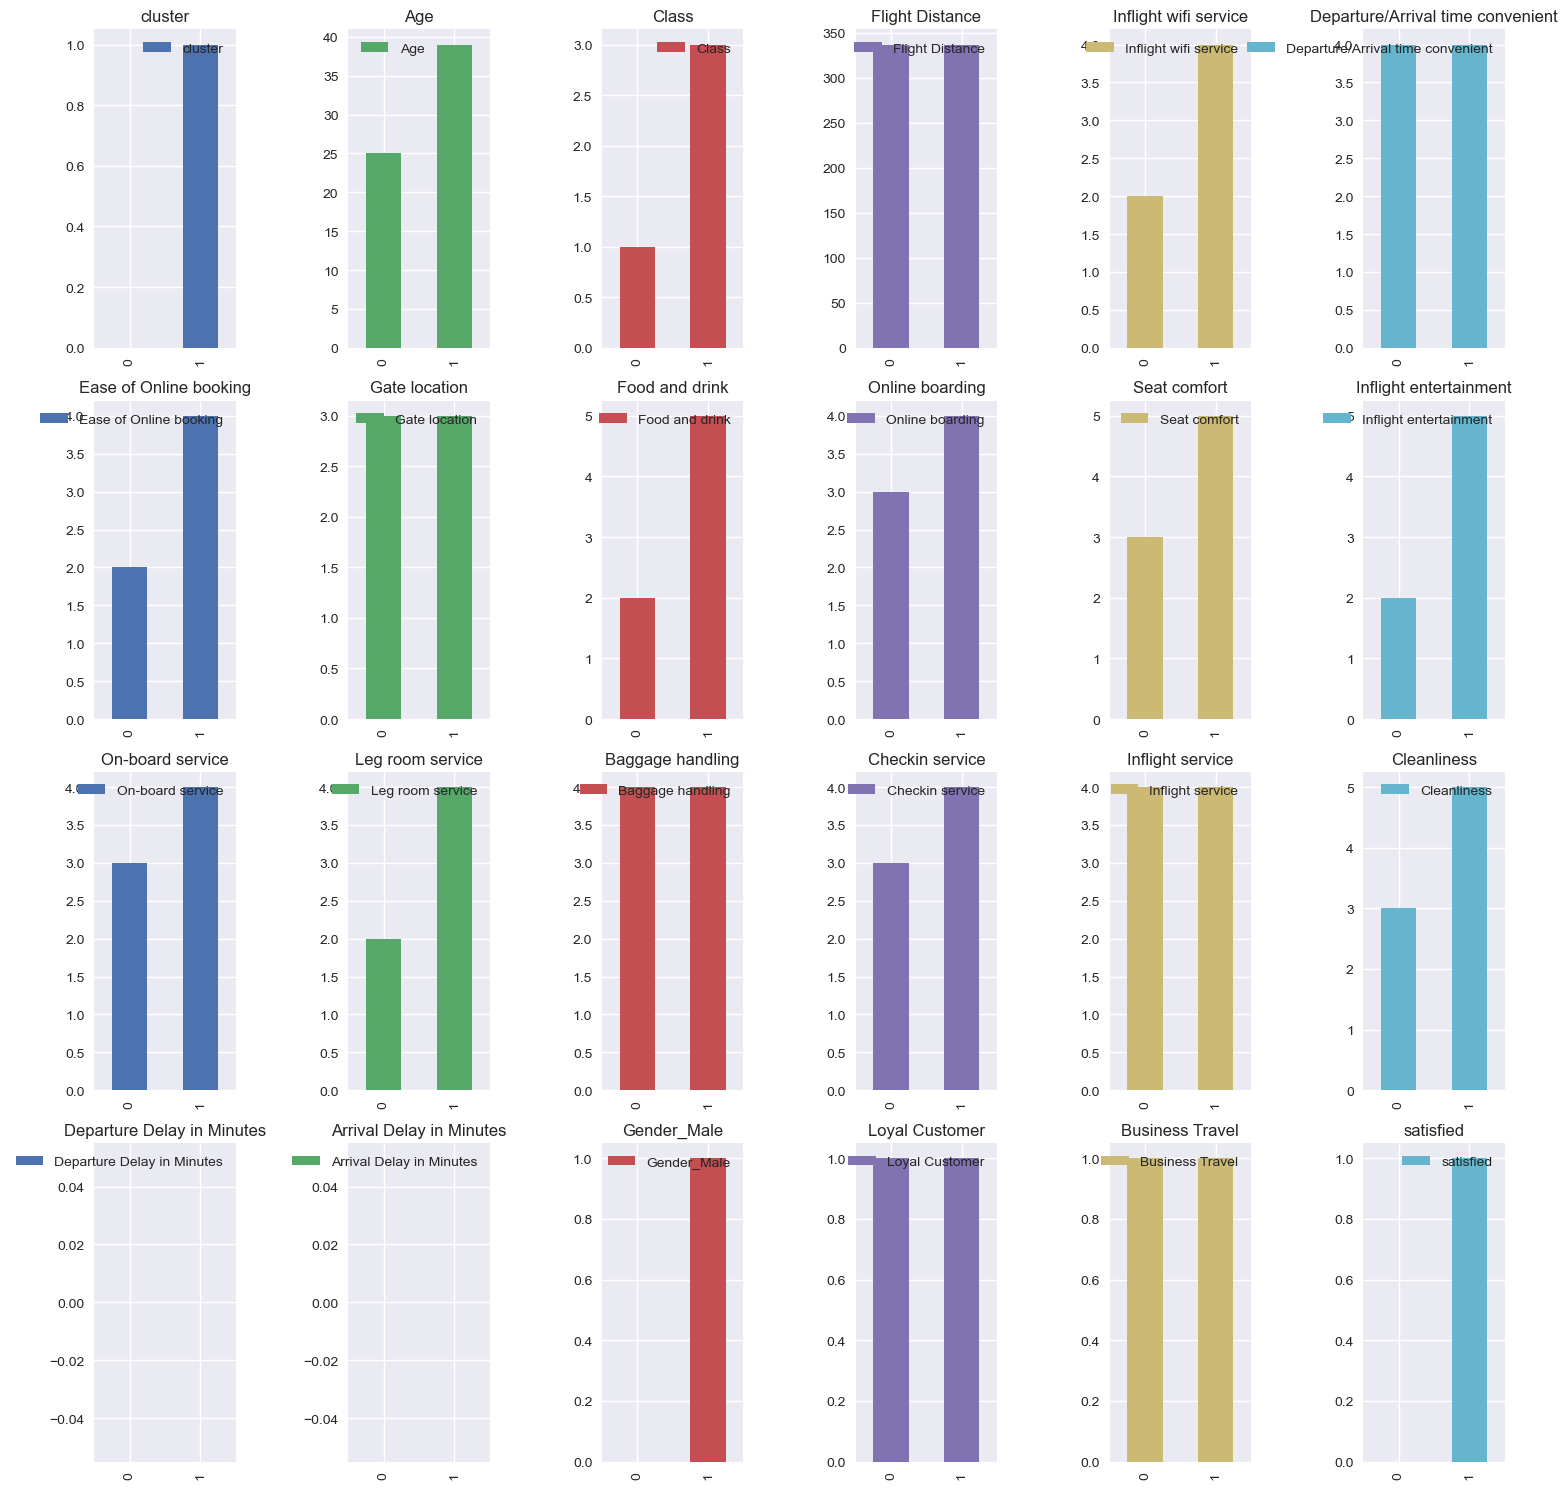

In [175]:
cluster_groups.plot(subplots = True, kind='bar', figsize=(15,15), sharex=False, layout=(4,6))

plt.tight_layout()

In [176]:
# Visualize means 

#fig, axes = plt.subplots(3,4, figsize =(20,10))
#axes = axes.ravel()
# Loop over columns and plot each in different figure
#for i, col in enumerate(cluster_groups.columns[1:]):
 #   axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  #  axes[i].set_title(f'Most_Freq{col}')

**Cluster 0: The Economy Group**

* Similar age, departure/arrival time convenience, & gate location to those in cluster 1. 
* Were in a lower class, traveled less distance, had less wifi service, less ease with booking, less food and drink, less boarding (later?), less seat comfort reported, less online entertainment and service. Could be the economy class booked for infrequent travelers where price is the highest factor. 


**Cluster 1: The Luxury Group**

* This group is in a higher overall class, travels longer distances, more wifi service, easier booking, more food and drink, higher boarding(earlier?), more seat comfort, inflight entertainment and on board service. 
Could be the frequent business travelers with status and the wealthy. 

## Preprocessing & PCA

In [177]:
# Select features from the dataset
X = df.drop(columns ='satisfied')

y = df['satisfied']

# Instantiate Scaler
scaler = StandardScaler()

# Fit and Transform data
scaled_df = scaler.fit_transform(X)


In [178]:
pca = PCA()
pca.fit_transform(scaled_df)

array([[ 1.88019606e+00, -1.63415754e-01, -4.78277294e-01, ...,
         2.11637666e-01, -7.16994276e-02, -1.82875916e-02],
       [-2.49268665e+00, -2.60643911e+00, -3.95977175e-02, ...,
         7.56830878e-02, -1.06293005e-01, -3.17079277e-01],
       [ 8.79434776e-01, -1.35901789e+00, -9.45341051e-01, ...,
         3.87145711e-01, -3.97359016e-02, -9.01015830e-06],
       ...,
       [ 3.83184160e-01,  9.12344443e-01, -5.08997437e-01, ...,
         2.31926838e-01, -3.76475421e-01, -1.42080684e-01],
       [ 1.52921172e+00, -2.17206437e+00, -4.37994135e-01, ...,
        -2.69129068e-01,  2.79856908e-02, -4.73541871e-02],
       [-1.50898335e+00,  7.97673949e-01, -7.77050745e-01, ...,
         2.21154468e-01, -5.92855388e-02, -7.81860673e-03]])

In [179]:
# Note: this shows how much of the variance does each component explain

pd.Series(pca.explained_variance_ratio_) 

0     0.206597
1     0.103242
2     0.097211
3     0.085528
4     0.081522
5     0.064647
6     0.044648
7     0.041681
8     0.040925
9     0.035841
10    0.030084
11    0.022640
12    0.020946
13    0.020204
14    0.018321
15    0.015666
16    0.014422
17    0.013160
18    0.012549
19    0.011124
20    0.009795
21    0.007660
22    0.001588
dtype: float64

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_95459/107809282.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


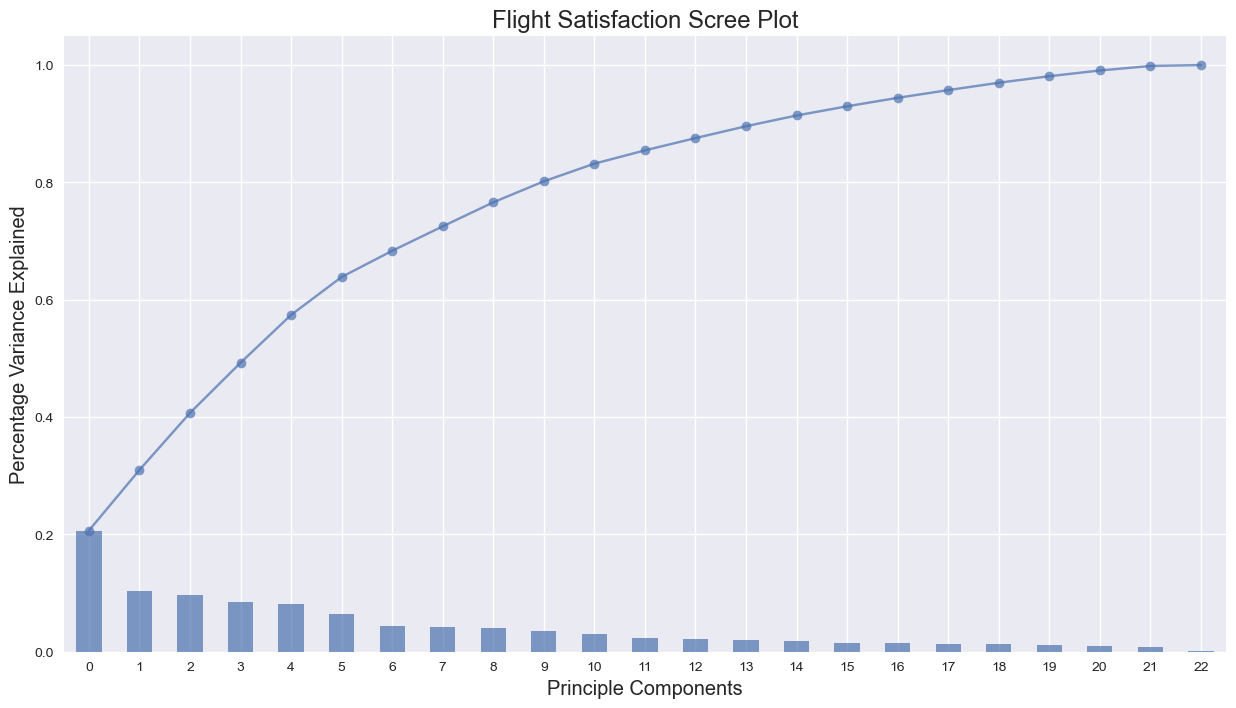

In [180]:
# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Flight Satisfaction Scree Plot", fontsize="xx-large")
plt.show();

* Looks like 9-17 components

## Split Data

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [182]:
# Instantiate Scaler
scaler = StandardScaler()

# Fit and transform data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [183]:
# Fit PCA 
pca = PCA(n_components = 13)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
X_train_pca.shape

(15000, 13)

## Modeling

In [184]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()
        

def eval_classification(true, pred, name, labels=None):
    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""
  
    print(name, '\n')
    print(classification_report(true, pred, target_names=labels))
    ConfusionMatrixDisplay.from_predictions(true, pred, display_labels=labels, normalize ='true')
                                          
 

  
    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

In [185]:
# create model architecture
input_dim = X_train_pca.shape[1]
 
model = Sequential()
 
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))

# Output Layer with 1 node
model.add(Dense(1, activation='sigmoid')) ## Classification Model
 
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                140       
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [186]:
# compile model with additional metrics 
from keras.metrics import Precision, Recall

# Compile your model with loss='bce, set metrics = ['acc', Precision(), Recall()]
precision = Precision(name='precision')
recall = Recall(name='recall')

model.compile(loss='bce',
                  optimizer='adam',
                  metrics=['accuracy', precision, recall])

In [187]:
# fit your model
history = model.fit(X_train_pca, y_train,
                        validation_data = (X_test_pca, y_test),
                        epochs = 100, verbose =0)

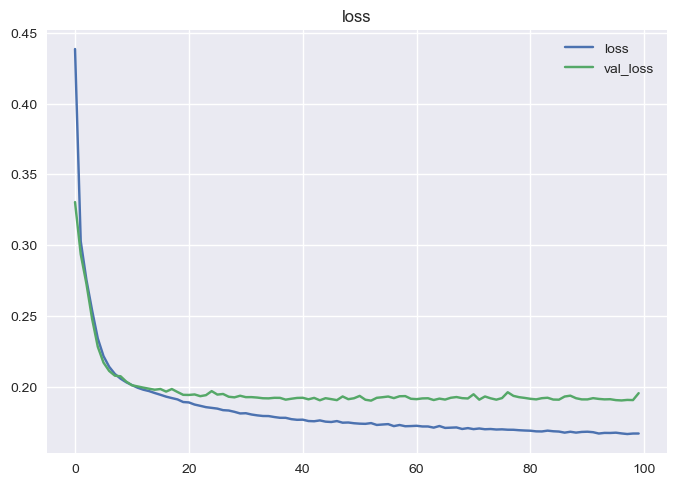

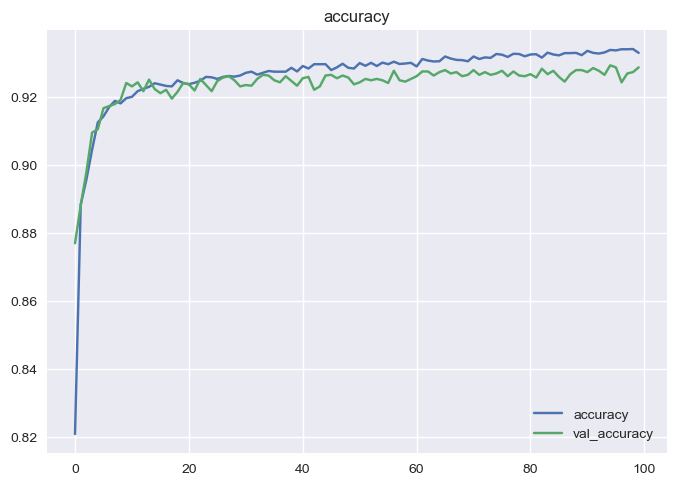

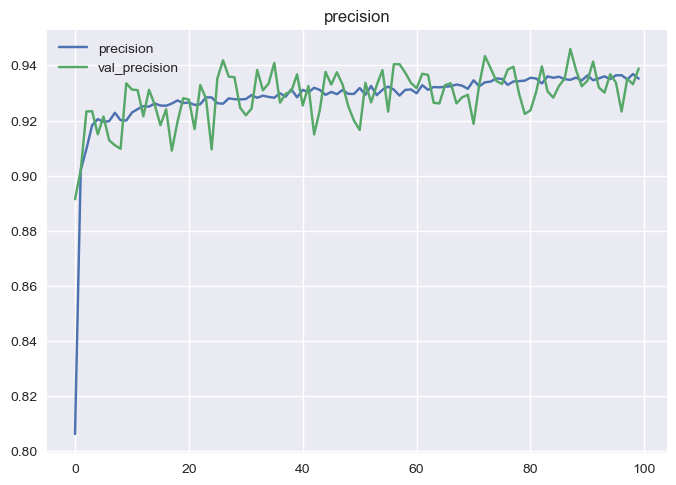

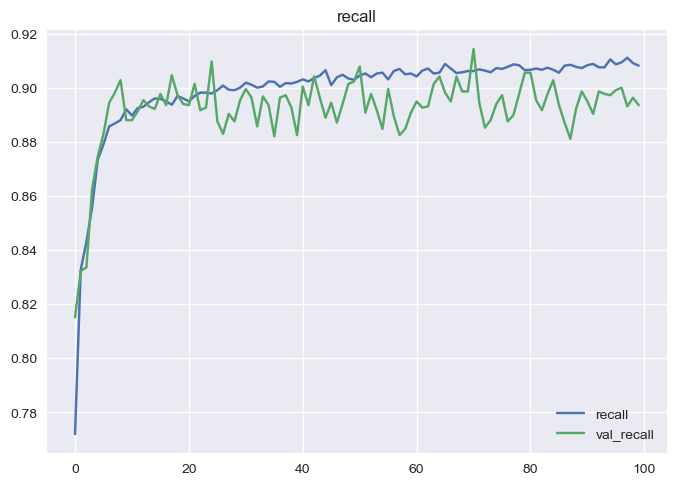

In [188]:
plot_history(history)

In [189]:
# Get predictions
train_pred_proba = model.predict(X_train_pca)
test_pred_proba = model.predict(X_test_pca)


# round predictions to integers instead of floats using np.rint()
train_preds = np.rint(train_pred_proba)
test_preds = np.rint(test_pred_proba)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

157/157 [==============================] - 0s 271us/step
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


base_class_model_train 

               precision    recall  f1-score   support

Not Satisfied       0.93      0.96      0.94      8504
    Satisfied       0.94      0.91      0.92      6496

     accuracy                           0.94     15000
    macro avg       0.94      0.93      0.93     15000
 weighted avg       0.94      0.94      0.94     15000



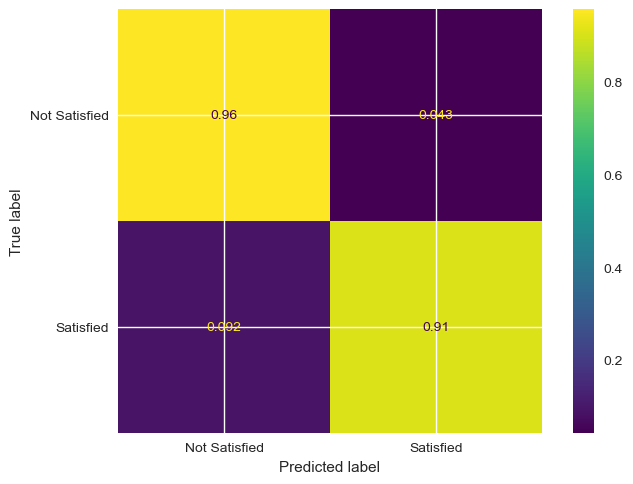

base_class_model_test 

               precision    recall  f1-score   support

Not Satisfied       0.92      0.96      0.94      2835
    Satisfied       0.94      0.89      0.92      2165

     accuracy                           0.93      5000
    macro avg       0.93      0.92      0.93      5000
 weighted avg       0.93      0.93      0.93      5000



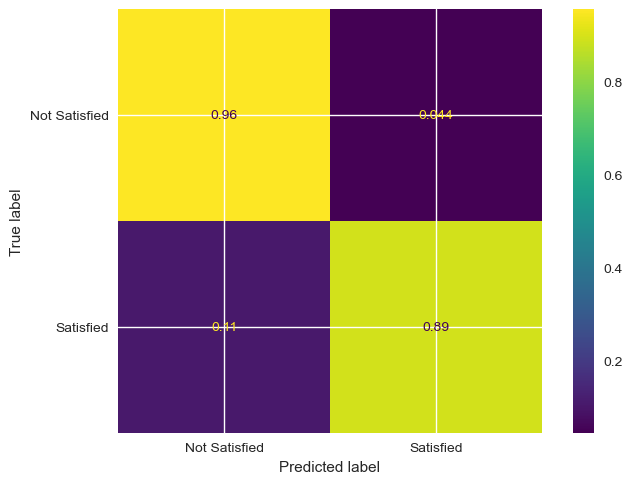

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
base_class_model_train,0.941101,0.907635,0.924066,0.9354
base_class_model_test,0.938865,0.893764,0.915760,0.9288


In [190]:
# Define labels for the confusion matrix

labels = ['Not Satisfied', 'Satisfied']

train_scores = eval_classification(y_train, train_preds, 
                                   name='base_class_model_train',
                                  labels=labels)
test_scores = eval_classification(y_test, test_preds, 
                                   name='base_class_model_test', labels = labels)

class_scores = pd.concat([train_scores, test_scores])
class_scores

## Iteration 2: 

In [191]:
# create model architecture
input_dim = X_train_pca.shape[1]
 
model2 = Sequential()
 
model2.add(Dense(10, input_dim=input_dim, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(5, activation='relu'))

# Output Layer with 1 node
model2.add(Dense(1, activation='sigmoid')) ## Classification Model
 
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                140       
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 dense_59 (Dense)            (None, 5)                 55        
                                                                 
 dense_60 (Dense)            (None, 1)                 6         
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [192]:
model2.compile(loss='bce',
                  optimizer='adam',
                  metrics=['accuracy', precision, recall])

In [193]:
# fit your model
history2 = model2.fit(X_train_pca, y_train,
                        validation_data = (X_test_pca, y_test),
                        epochs = 100, verbose =0)

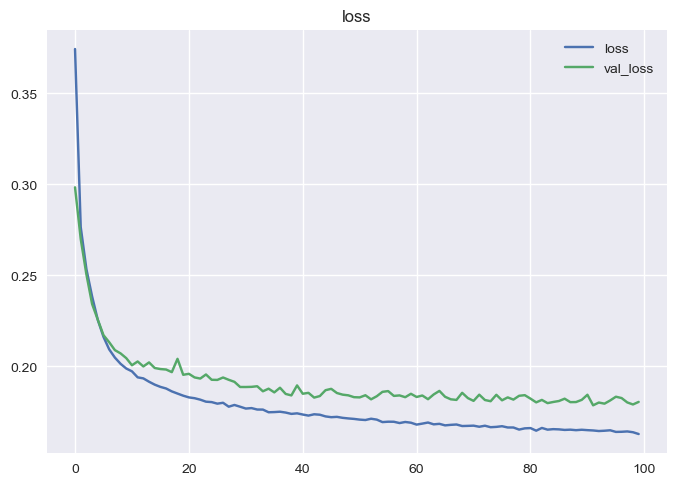

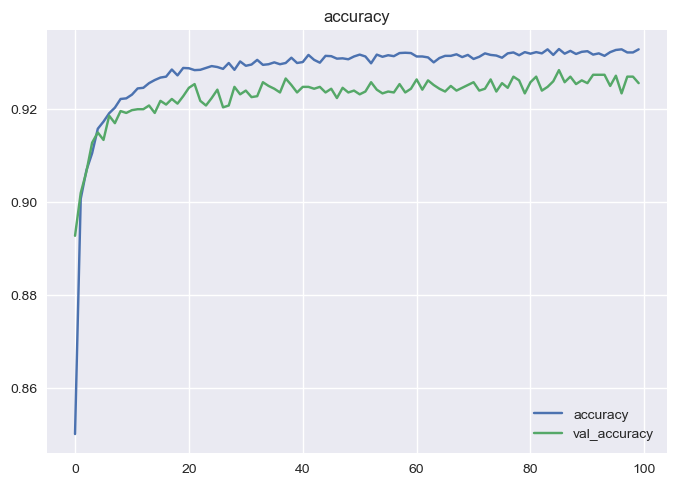

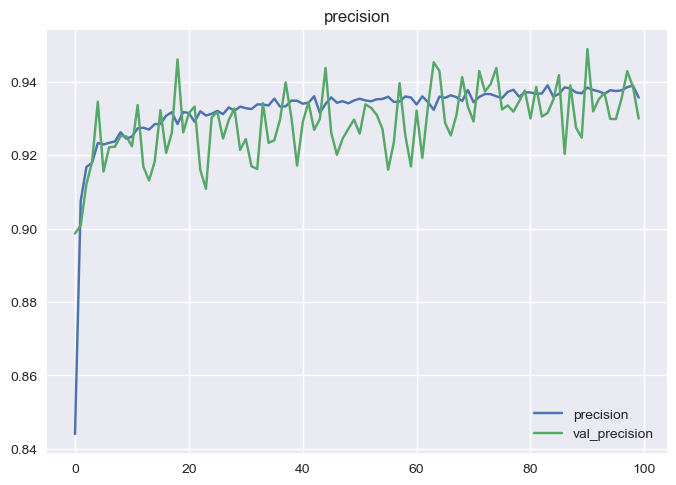

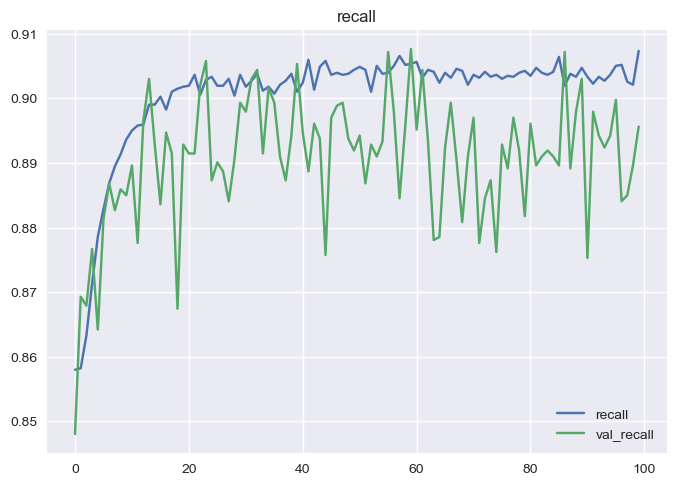

In [194]:
plot_history(history2)

In [195]:
# Get predictions
train_pred_proba2 = model2.predict(X_train_pca)
test_pred_proba2 = model2.predict(X_test_pca)


# round predictions to integers instead of floats using np.rint()
train_preds2 = np.rint(train_pred_proba2)
test_preds2 = np.rint(test_pred_proba2)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds2[:5])
print(train_preds2[:5])

157/157 [==============================] - 0s 286us/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


base_class_model_train2 

               precision    recall  f1-score   support

Not Satisfied       0.93      0.95      0.94      8504
    Satisfied       0.94      0.91      0.92      6496

     accuracy                           0.94     15000
    macro avg       0.94      0.93      0.93     15000
 weighted avg       0.94      0.94      0.94     15000



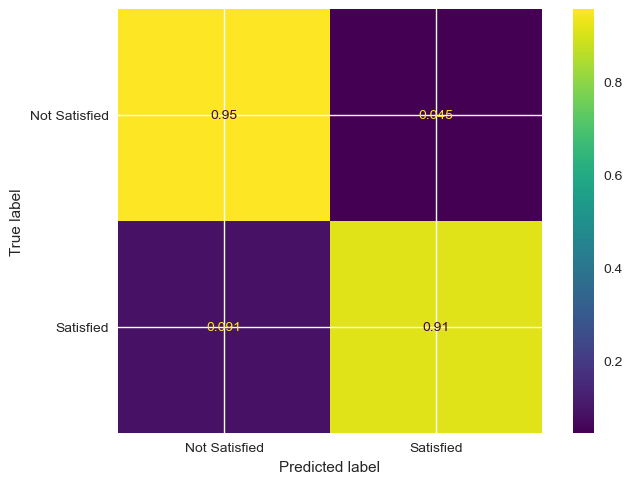

base_class_model_test2 

               precision    recall  f1-score   support

Not Satisfied       0.92      0.95      0.94      2835
    Satisfied       0.93      0.90      0.91      2165

     accuracy                           0.93      5000
    macro avg       0.93      0.92      0.92      5000
 weighted avg       0.93      0.93      0.93      5000



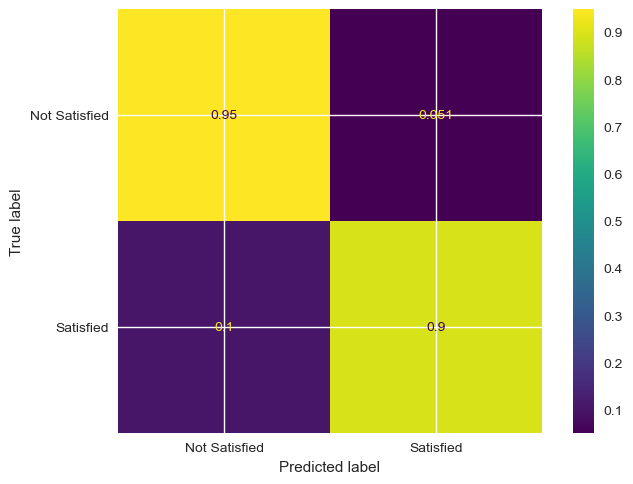

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
base_class_model_train2,0.939110,0.909329,0.923979,0.9352
base_class_model_test2,0.929976,0.895612,0.912471,0.9256


In [196]:
# Define labels for the confusion matrix
labels = ['Not Satisfied', 'Satisfied']

train_scores2 = eval_classification(y_train, train_preds2, 
                                   name='base_class_model_train2',
                                  labels=labels)
test_scores2 = eval_classification(y_test, test_preds2, 
                                   name='base_class_model_test2',
                                  labels=labels)
class_scores2 = pd.concat([train_scores2, test_scores2])
class_scores2

## Iteration 3: Regularization

In [197]:
# create model architecture
input_dim = X_train_pca.shape[1]
 
model3 = Sequential()
 
model3.add(Dense(10, input_dim=input_dim, activation='relu'))
model3.add(Dropout(.2))

model3.add(Dense(10, activation='relu'))
model3.add(Dropout(.2))

model3.add(Dense(5, activation='relu'))
model3.add(Dropout(.2))

# Output Layer with 1 node
model3.add(Dense(1, activation='sigmoid')) ## Classification Model
 
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 10)                140       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_63 (Dense)            (None, 5)                 55        
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 dense_64 (Dense)            (None, 1)               

In [198]:
model3.compile(loss='bce',
                  optimizer='adam',
                  metrics=['accuracy', precision, recall])

In [199]:
# fit your model
history3 = model3.fit(X_train_pca, y_train,
                        validation_data = (X_test_pca, y_test),
                        epochs = 100, verbose =0)

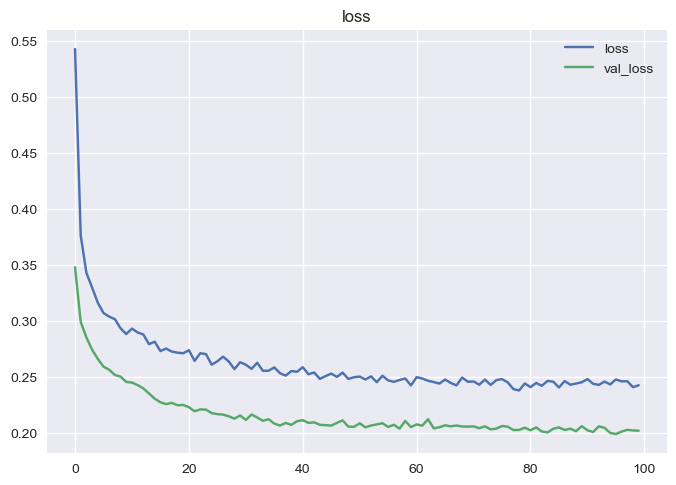

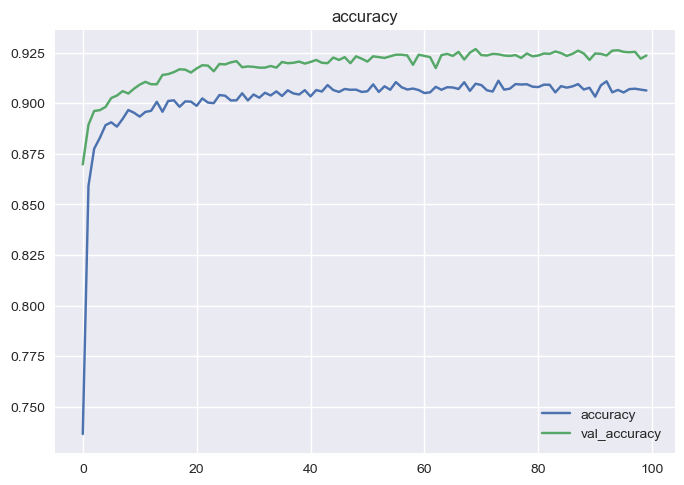

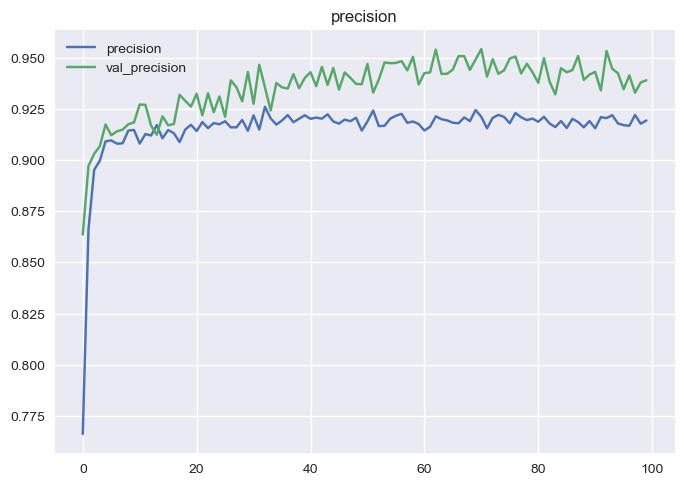

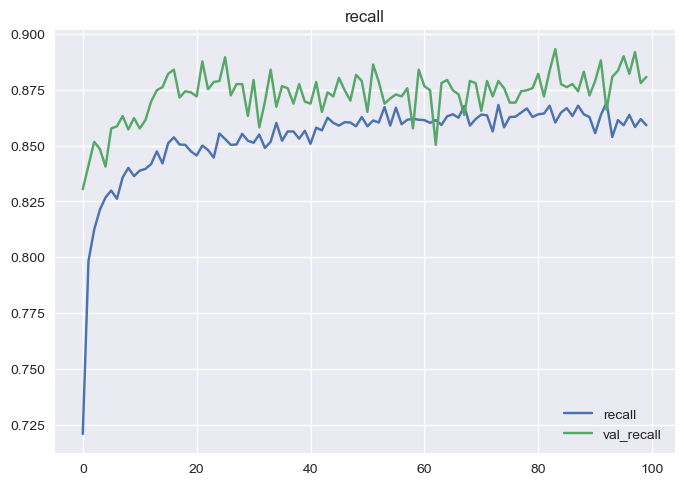

In [200]:
plot_history(history3)

In [201]:
# Get predictions
train_pred_proba3 = model3.predict(X_train_pca)
test_pred_proba3 = model3.predict(X_test_pca)


# round predictions to integers instead of floats using np.rint()
train_preds3 = np.rint(train_pred_proba3)
test_preds3 = np.rint(test_pred_proba3)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds3[:5])
print(train_preds3[:5])

157/157 [==============================] - 0s 285us/step
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


base_class_model_train3 

               precision    recall  f1-score   support

Not Satisfied       0.92      0.96      0.94      8504
    Satisfied       0.94      0.88      0.91      6496

     accuracy                           0.93     15000
    macro avg       0.93      0.92      0.93     15000
 weighted avg       0.93      0.93      0.93     15000



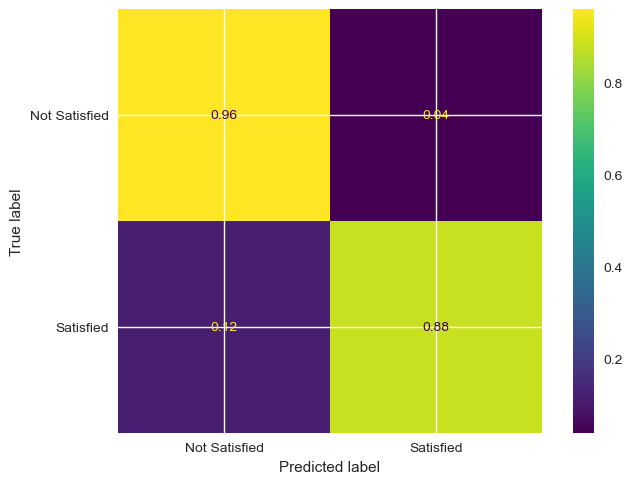

base_class_model_test3 

               precision    recall  f1-score   support

Not Satisfied       0.91      0.96      0.93      2835
    Satisfied       0.94      0.88      0.91      2165

     accuracy                           0.92      5000
    macro avg       0.93      0.92      0.92      5000
 weighted avg       0.92      0.92      0.92      5000



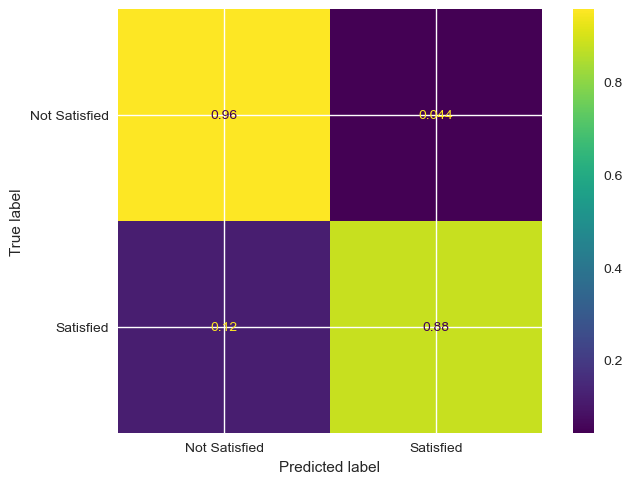

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
base_class_model_train3,0.944289,0.884544,0.913441,0.9274
base_class_model_test3,0.938946,0.880831,0.908961,0.9236


In [202]:
# Define labels for the confusion matrix
labels = ['Not Satisfied', 'Satisfied']

train_scores3 = eval_classification(y_train, train_preds3, 
                                   name='base_class_model_train3',
                                  labels=labels)
test_scores3 = eval_classification(y_test, test_preds3, 
                                   name='base_class_model_test3',
                                  labels=labels)
class_scores3 = pd.concat([train_scores3, test_scores3])
class_scores3